gpu사용

In [1]:
! git clone --recursive https://github.com/Microsoft/LightGBM


Cloning into 'LightGBM'...
remote: Enumerating objects: 25240, done.
remote: Counting objects: 100% (916/916), done.
remote: Compressing objects: 100% (576/576), done.
remote: Total 25240 (delta 608), reused 576 (delta 336), pack-reused 24324
Receiving objects: 100% (25240/25240), 18.64 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (18557/18557), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Co

In [2]:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

In [3]:
import pandas as pd
import numpy as np


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Default Prediction/default-prediction'

In [6]:
train_df = pd.read_csv(path + '/data/preprocessed_train.csv')
train_df

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,mths_since_last_delinq,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,depvar
0,-1.081754,-0.714580,1.268921,-0.379776,0.347799,-0.356359,-0.606131,0.111419,-0.125132,-0.069391,-0.122671,-0.789949,-0.087483,-0.021592,-0.13636,-1.480871,-1.480713,-0.16441,0.410283,1.168632,-1.490430,-1.926837,-0.014032,-0.01403,-0.862201,2.439309,2.439258,-0.813329,-1.144282,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.020849,0.075520,-1.627770,-0.379776,0.347799,1.155429,-0.480678,-0.056876,-0.125132,-0.069391,-0.122671,-0.722752,-0.087483,-0.021592,-0.13636,-0.677547,-0.677091,-0.16441,0.410283,-0.663281,-0.618820,-0.376955,-0.014032,-0.01403,-0.291495,-0.931324,-0.931310,-0.813329,-0.864096,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.020849,-0.486924,0.611608,-0.379776,2.448541,-0.356359,-0.444100,-0.561764,-0.125132,-0.069391,-0.122671,-0.656279,-0.087483,-0.021592,-0.13636,-1.031955,-1.031630,-0.16441,0.410283,-0.846472,-0.998894,1.431937,-0.014032,-0.01403,-0.526425,-0.762793,-0.762782,2.118602,-0.303724,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.131028,0.343351,-0.266789,4.040077,1.398170,-0.356359,-0.428430,0.448011,-0.125132,-0.069391,-0.122671,1.300588,-0.087483,-0.021592,-0.13636,0.149404,0.150166,-0.16441,0.410283,0.069484,0.286522,-0.335179,-0.014032,-0.01403,-0.456365,-0.425729,-0.425725,0.359443,-0.583910,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.087854,-0.594056,0.804166,-0.379776,0.347799,2.667217,-0.365935,-1.066652,-0.125132,-0.069391,1.104094,-0.809459,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,-0.16441,0.410283,-0.663281,-0.370890,-0.506460,-0.014032,-0.01403,-0.598701,-1.099856,-1.099839,-0.813329,-0.303724,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.002087,-0.125353,-0.100381,-0.379776,2.448541,1.155429,-0.224164,-0.309320,6.527297,-0.069391,-0.122671,-0.691521,-0.087483,-0.021592,-0.13636,0.740084,0.741064,-0.16441,0.410283,0.252676,1.070512,1.014179,-0.014032,-0.01403,1.064940,-1.099856,-1.099839,-0.813329,0.536833,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
99996,-0.934344,-0.125353,-1.858364,-0.379776,-0.702572,-0.356359,-0.648365,-1.066652,-0.125132,-0.069391,-0.122671,-0.827433,-0.087483,-0.021592,-0.13636,-0.913819,-0.913451,-0.16441,0.410283,-0.846472,-0.915900,-1.743024,-0.014032,-0.01403,-0.611775,2.439309,2.439258,-0.813329,1.657577,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
99997,0.090825,-0.379792,1.617189,-0.379776,0.347799,-0.356359,-0.328800,-0.393468,-0.125132,-0.069391,-0.122671,-0.226146,-0.087483,-0.021592,-0.13636,-0.866565,-0.866179,-0.16441,0.410283,1.351824,-0.815720,0.441850,-0.014032,-0.01403,-0.454358,-0.931324,-0.931310,-0.813329,-0.303724,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
99998,1.801674,-0.580665,-1.662240,-0.379776,0.347799,-0.356359,-0.566307,-1.739835,-0.125132,-0.069391,-0.122671,-0.842486,-0.087483,-0.021592,-0.13636,-0.972887,-0.972541,-0.16441,0.410283,-1.579237,-0.851520,0.809477,-0.014032,-0.01403,-0.418878,0.585460,0.585446,-0.813329,1.937763,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [7]:
train_df.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high',
       'mths_since_last_delinq', 'emp_length', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2', 'depvar'],
      dtype='obj

In [8]:
test_df = pd.read_csv(path + '/data/preprocessed_test.csv')
test_df = test_df.drop('ID', axis=1)
test_df = test_df[['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high',
       'mths_since_last_delinq', 'emp_length', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2']]

Define X and y

In [9]:
X = train_df.drop('depvar', axis=1)
y = train_df['depvar']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [12]:
X_train

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,mths_since_last_delinq,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2
51446,0.131028,-0.125353,-1.014437,-0.379776,-0.702572,-0.356359,-0.535755,0.279715,-0.125132,-0.069391,-0.122671,0.515755,-0.087483,-0.021592,-0.13636,0.976356,0.977423,-0.16441,0.410283,0.069484,1.181973,-0.652676,-0.014032,-0.014030,-0.091711,0.753992,0.753974,-0.813329,-0.864096,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
64608,0.649196,-0.620839,1.202357,-0.379776,0.347799,-0.356359,-0.398017,-1.066652,-0.125132,-0.069391,-0.122671,-0.653738,-0.087483,-0.021592,-0.13636,-0.205003,-0.204373,-0.16441,-2.437320,-0.480090,-0.535186,-1.016125,-0.014032,-0.014030,-0.692092,-0.425729,-0.425725,-0.813329,-0.023538,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
58762,0.564324,-0.326226,0.067216,-0.379776,-0.702572,-0.356359,-0.409885,-0.056876,-0.125132,-0.069391,-0.122671,-0.448832,-0.087483,-0.021592,-0.13636,-0.887238,-0.886860,-0.16441,0.410283,-0.296898,-0.813840,0.696683,-0.014032,-0.014030,-0.725208,-0.257198,-0.257197,1.825409,1.657577,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5313,-0.076686,-0.031612,-0.163378,-0.379776,-0.702572,-0.356359,-0.610581,-0.225172,-0.125132,-0.069391,-0.122671,-0.650020,-0.087483,-0.021592,-0.13636,-1.232786,-1.232536,-0.16441,0.410283,-0.846472,-1.215762,-0.619255,-0.014032,-0.014030,-0.765862,-0.762793,-0.762782,1.532216,-0.023538,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
81786,-1.360940,-0.299443,-1.835780,-0.379776,-0.702572,-0.356359,-0.513316,-0.309320,-0.125132,-0.069391,-0.122671,0.811952,-0.087483,-0.021592,-0.13636,-0.630293,-0.629820,-0.16441,0.410283,-1.029664,-0.657139,-0.552414,-0.014032,-0.014030,-0.767791,1.259587,1.259559,-0.813329,1.377391,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70384,-1.204596,1.682503,-0.754127,-0.379776,-0.702572,-0.356359,0.154650,0.027272,-0.125132,-0.069391,-0.122671,2.070188,-0.087483,-0.021592,-0.13636,1.685171,1.686501,-0.16441,0.410283,0.252676,1.652149,-1.312733,-0.014032,-0.014030,0.340731,1.596650,1.596616,-0.813329,-0.583910,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
93425,1.153964,-0.306138,-0.031440,-0.379776,0.347799,1.155429,-0.053788,-0.645912,-0.125132,-0.069391,-0.122671,-0.704465,-0.087483,-0.021592,-0.13636,-0.205003,-0.204373,-0.16441,0.410283,0.069484,0.004747,-0.038571,-0.014032,-0.014030,0.436424,-0.088666,-0.088668,-0.813329,-0.583910,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
63687,1.095893,-0.553882,0.813675,-0.379776,1.398170,-0.356359,-0.288466,-0.898356,-0.125132,-0.069391,-0.122671,0.074314,-0.087483,-0.021592,-0.13636,-0.913819,-0.919360,-0.16441,0.410283,0.252676,-0.816735,-0.172254,11.991536,11.892298,-0.262496,-0.594261,-0.594253,-0.813329,-0.583910,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
81548,0.314174,0.050746,-1.809630,-0.379776,2.448541,-0.356359,-0.215865,0.027272,-0.125132,-0.069391,-0.122671,1.242377,-0.087483,-0.021592,-0.13636,2.500309,2.501941,-0.16441,-2.437320,0.069484,1.454873,-1.362864,-0.014032,-0.014030,0.980536,2.944904,2.944844,-0.813329,-0.864096,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


하이퍼 파라미터 찾기  https://www.kaggle.com/mlisovyi/lighgbm-hyperoptimisation-with-f1-macro



In [23]:
np.unique([1,1,1,1,0,0,0])

array([0, 1])

In [19]:
from sklearn.metrics import f1_score
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 

import lightgbm as lgb
fit_params={"early_stopping_rounds":300, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [(X_valid,y_valid)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': False,
            'categorical_feature': 'auto'}

def learning_rate_power_0997(current_iter):
    base_learning_rate = 0.1
    min_learning_rate = 0.02
    lr = base_learning_rate  * np.power(.995, current_iter)
    return max(lr, min_learning_rate)

fit_params['callbacks'] = [lgb.reset_parameter(learning_rate=learning_rate_power_0997)]

In [59]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# {'learning_rate': 0.1,
#  'max_depth': 20,
#  'min_child_samples': 10,
#  'num_leaves': 120,
#  'reg_alpha': 8}

param_test ={'num_leaves': [80, 100, 120, 140], 
             'min_child_samples': [5, 10, 15, 20], 
             'max_depth': [15, 20, 25],
            #  'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'learning_rate': [0.05, 0.1, 0.2], 
            #  'colsample_bytree': sp_uniform(loc=0.8, scale=0.15),
             'reg_alpha': [6, 8, 10, 12, 14],
            #  'reg_lambda': [0, 1e-3, 1e-1, 1, 10, 50, 100]
            }

In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
lgbm = LGBMClassifier()

clf = RandomizedSearchCV(lgbm,param_test, scoring='f1_macro',n_iter=100 )


In [61]:
clf.fit(X_train, y_train) # _ = gs.fit(X_train, y_train, **fit_params)

[LightGBM] [Info] Number of positive: 20890, number of negative: 43110
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3520
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326406 -> initscore=-0.724484
[LightGBM] [Info] Start training from score -0.724484
[LightGBM] [Info] Number of positive: 20890, number of negative: 43110
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 51
[LightGBM] [

RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [10, 20, 30, 40],
                                        'min_child_samples': [2, 5, 10],
                                        'num_leaves': [80, 100, 120, 140],
                                        'reg_alpha': [6, 8, 10, 12, 14]},
                   scoring='f1_macro')

In [62]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_samples': 10,
 'num_leaves': 120,
 'reg_alpha': 8}

In [63]:
clf.best_score_

0.7022915383748835

In [75]:
y_pred = clf.predict(X_valid)

In [76]:
# y_valid가 1일 확률 출력
y_pred_prob = clf.predict_proba(X_valid)
y_pred_prob[:,1]

array([0.5716213 , 0.19841141, 0.91784463, ..., 0.05945415, 0.20316747,
       0.5766455 ])

eveluate

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns

In [78]:
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7552
정밀도: 0.6516
재현율: 0.5197
AUC: 0.6936
F1: 0.5782


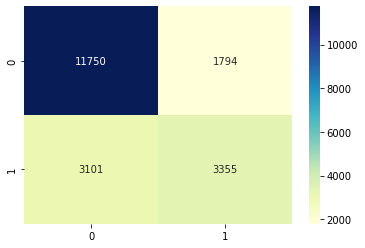

In [79]:
# 성능 확인
get_clf_eval(y_valid, y_pred)


정확도: 0.7214
정밀도: 0.5488
재현율: 0.7684
AUC: 0.7337
F1: 0.6403


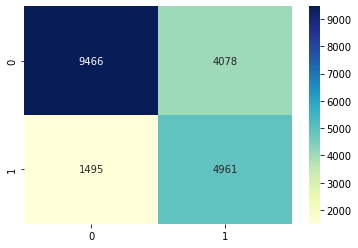

In [87]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.29)

In [89]:
# 제출 양식 다운로드
submit = pd.read_csv(path + '/data/sample_submission.csv')

# prediction 수행
test_df = pd.read_csv(path + '/data/preprocessed_test.csv')
test_df = test_df.drop('ID', axis=1)
test_X = test_df[X.columns]

y_pred_prob = clf.predict_proba(test_X)
y_pred_prob = (y_pred_prob[:,1]>0.5).astype(int)

submit['answer'] = y_pred_prob

# 제출 파일 저장
submit.to_csv(path + '/data/prediction.csv', index=False)

In [57]:
y_pred_prob

array([1, 1, 1, ..., 0, 0, 0])

In [58]:
test_X

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,mths_since_last_delinq,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2
0,0.314174,-0.776449,0.899257,-0.379776,-0.702572,1.155429,-0.584341,-1.234947,-0.125132,-0.069391,-0.122671,-0.806971,-0.087483,-0.021592,-0.13636,-0.665733,-0.665273,-0.164410,0.410283,-1.396046,-0.583998,-0.945106,-0.014032,-0.01403,-0.750438,0.248397,0.248389,-0.813329,0.536833,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.319241,-0.125353,-0.540174,-0.379776,-0.702572,-0.356359,0.427206,-0.393468,-0.125132,-0.069391,-0.122671,-0.099221,-0.087483,-0.021592,-0.13636,0.740084,0.741064,-0.164410,-2.437320,-0.296898,0.318260,1.452824,-0.014032,-0.01403,0.877741,-0.594261,-0.594253,0.945829,-0.864096,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.579220,-0.286051,0.566441,-0.379776,-0.702572,-0.356359,-0.240158,-0.309320,-0.125132,-0.069391,-0.122671,-0.648636,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,0.926563,0.410283,-0.846472,-0.410262,0.178663,-0.014032,-0.01403,-0.384376,-0.594261,-0.594253,0.945829,1.657577,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.002087,-0.034290,1.403236,-0.379776,-0.702572,-0.356359,1.220810,0.111419,-0.125132,-0.069391,-0.122671,0.146255,-0.087483,-0.021592,-0.13636,1.590663,1.591958,-0.164410,-2.437320,0.802250,0.941188,0.684150,-0.014032,-0.01403,1.691199,-0.931324,-0.931310,-0.813329,-0.864096,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.589493,-0.326226,0.843391,-0.379776,1.398170,-0.356359,0.260214,-0.056876,-0.125132,-0.069391,-0.122671,0.031622,-0.087483,-0.021592,-0.13636,0.976356,0.977423,-0.164410,-2.437320,0.252676,0.568748,0.354121,-0.014032,-0.01403,1.944718,0.585460,0.585446,-0.813329,-0.864096,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,-0.579220,0.477266,-1.128545,-0.379776,-0.702572,1.155429,-0.329125,0.700455,-0.125132,-0.069391,-0.122671,-0.752067,-0.087483,-0.021592,-0.13636,-0.205003,-0.204373,-0.164410,0.410283,0.252676,-0.165829,-0.798891,-0.014032,-0.01403,-0.400978,-0.931324,-0.931310,-0.813329,-0.864096,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
35812,-1.081754,-0.393183,1.669489,0.725187,-0.702572,-0.356359,0.226046,0.363863,-0.125132,-0.069391,-0.122671,-0.703281,-0.087483,-0.021592,-0.13636,-1.031955,-1.031630,-0.164410,0.410283,-0.480090,-1.041049,0.638197,-0.014032,-0.01403,-0.737394,0.416929,0.416917,-0.226943,-1.144282,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
35813,0.133261,-0.339617,-0.108701,-0.379776,-0.702572,-0.356359,-0.486473,-1.487391,-0.125132,-0.069391,-0.122671,-0.730627,-0.087483,-0.021592,-0.13636,-0.913819,-0.913451,-0.164410,0.410283,-0.846472,-0.864682,-0.853199,-0.014032,-0.01403,-0.419849,0.416929,0.416917,-0.813329,-0.583910,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35814,-0.378207,0.140496,-1.016814,-0.379776,-0.702572,1.155429,-0.412899,-0.982504,-0.125132,-0.069391,-0.122671,-0.659419,-0.087483,-0.021592,-0.13636,-0.441275,-0.440732,-0.164410,0.410283,-0.663281,-0.394242,-0.773825,-0.014032,-0.01403,-0.323743,1.091055,1.091031,-0.813329,-0.583910,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
